In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the CSV files
predicted_cer_df = pd.read_csv('C:/Users/larak/OneDrive/Documents/GitHub/HL-Spring-24/cer_prediction_model/predicted_cer_results.csv')
readable_df = pd.read_csv('C:/Users/larak/Downloads/readable_v5.csv')

In [4]:
readable_df

,file,lex_ocr,fk_ocr,flesch_ocr,lex_gold,fk_gold,flesch_gold,CER,percent_misspelled,count_thes,...,count_drv,count_va,count_buddhist,count_su,percent_alphabetic,percent_numeric,percent_punctuation,squared_letter_devs,absolute_letter_devs,substitution_hhi
0,GALE_CK2349346194.txt,0.561769,4.628641,82.944254,0.446995,14.917718,36.174668,0.486949,25.955414,1,...,0,0,0,1,66.065496,3.607024,9.871856,0.002616,0.184889,0.001836
1,GALE_CK2349347998.txt,0.482604,8.833292,64.280919,0.357855,15.745466,33.331225,0.212453,16.981132,1,...,0,0,0,0,73.832162,1.012815,7.895825,0.004004,0.209771,0.002886
2,GALE_CK2349354090.txt,0.395423,12.930099,38.573800,0.341304,14.649109,29.873484,0.062577,5.730028,1,...,0,0,0,0,79.619317,0.698196,3.640595,0.003797,0.231380,0.003848
3,GALE_CK2349354764.txt,0.497585,5.614244,82.566375,0.247114,8.993146,57.297364,0.362739,35.954344,1,...,0,0,0,1,65.915521,6.568310,6.901778,0.004556,0.270927,0.006674
4,GALE_CK2349355800.txt,0.708661,4.309904,76.668466,0.578313,13.401156,33.573502,0.230804,27.987421,1,...,0,0,0,0,71.580289,1.869159,8.708581,0.002436,0.182133,0.003126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,GALE_CK2349543544.txt,0.635616,8.894206,58.788655,0.587500,9.489297,59.974125,0.215506,8.206687,1,...,0,0,0,0,73.627845,2.588130,7.987506,0.001736,0.166182,0.002337
183,GALE_CK2349549783.txt,0.599455,12.626183,44.283024,0.576441,12.090331,46.437895,0.144635,4.829545,1,...,0,0,0,0,79.442971,0.486295,3.404067,0.002076,0.186388,0.002666
184,GALE_CK2349566695.txt,0.577465,12.138952,48.940389,0.370395,10.607638,48.356076,0.312703,27.250608,2,...,0,0,0,0,78.170732,1.512195,4.097561,0.002699,0.179589,0.002500
185,GALE_CK2349567370.txt,0.692857,8.586829,62.009890,0.505800,17.256996,23.874506,0.379322,31.908832,1,...,0,0,0,0,70.191182,1.794772,10.846664,0.002347,0.159251,0.001480


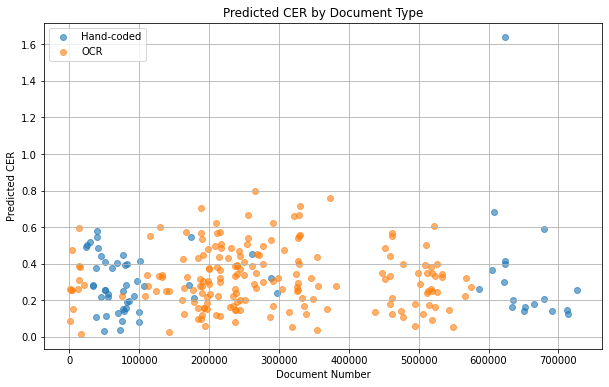

In [23]:
# extract the last six digits from the filename and convert to integer
predicted_cer_df['doc_number'] = predicted_cer_df['filename'].str.extract(r'(\d{6})$').astype('int')

# identify which documents are OCRd and which are hand-coded
predicted_cer_df['Type'] = predicted_cer_df['filename'].apply(lambda x: 'OCR' if (str(x) + ".txt") in readable_df['file'].values else 'Hand-coded')

# plot the data
plt.figure(figsize=(10, 6))
for label, df in predicted_cer_df.groupby('Type'):
    plt.scatter(df['doc_number'], df['predicted_cer'], label=label, alpha=0.6)
plt.xlabel('Document Number')
plt.ylabel('Predicted CER')
plt.title('Predicted CER by Document Type')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Calculate and print the t-test for the means of two independent samples
ocr_cer = predicted_cer_df[predicted_cer_df['Type'] == 'OCR']['predicted_CER']
hand_coded_cer = predicted_cer_df[predicted_cer_df['Type'] == 'Hand-coded']['predicted_CER']

t_stat, p_value = ttest_ind(ocr_cer, hand_coded_cer, equal_var=False)  # Assume unequal variances
print(f"T-test results -- t-statistic: {t_stat}, p-value: {p_value}")

T-test results -- t-statistic: 0.327126442163422, p-value: 0.7443654208952988


In [11]:
ocr_std = ocr_cer.std()
hand_coded_std = hand_coded_cer.std()
print(f"Standard Deviation -- OCR: {ocr_std}, Hand-coded: {hand_coded_std}")

Standard Deviation -- OCR: 0.1614164132266327, Hand-coded: 0.22525115685419322


In [13]:
hand_coded_docs = predicted_cer_df[predicted_cer_df['Type'] == 'Hand-coded']

print("Document Numbers for Hand-coded Files:")
print(hand_coded_docs['doc_number'].tolist())

Document Numbers for Hand-coded Files:
[23190, 25729, 29481, 33326, 33493, 37236, 37611, 39012, 39832, 40332, 44703, 44840, 49917, 50706, 51230, 51305, 52692, 54600, 54872, 60799, 67309, 68739, 72296, 75669, 76728, 77190, 77263, 77425, 80019, 81218, 81243, 81924, 82155, 84921, 92927, 96766, 99659, 100056, 100824, 106939, 170498, 173748, 177761, 261347, 288949, 297642, 586902, 604272, 607881, 621499, 623209, 623316, 623403, 633181, 634582, 650923, 651514, 664715, 679295, 679617, 690548, 712712, 714314, 726403]


Note: the above documents, when searching in the DB, do not seem hand-coded. They look OCRed. Thus, there must be an inconsistency. It seems that all documents here are indeed OCR.

Let's find another way to do sanity checks. We can do a predicted vs. true scatter plot for our documents which we do indeed have truth values for.

In [10]:
readable_df

,file,lex_ocr,fk_ocr,flesch_ocr,lex_gold,fk_gold,flesch_gold,CER,percent_misspelled,count_thes,...,count_drv,count_va,count_buddhist,count_su,percent_alphabetic,percent_numeric,percent_punctuation,squared_letter_devs,absolute_letter_devs,substitution_hhi
0,GALE_CK2349346194.txt,0.561769,4.628641,82.944254,0.446995,14.917718,36.174668,0.486949,25.955414,1,...,0,0,0,1,66.065496,3.607024,9.871856,0.002616,0.184889,0.001836
1,GALE_CK2349347998.txt,0.482604,8.833292,64.280919,0.357855,15.745466,33.331225,0.212453,16.981132,1,...,0,0,0,0,73.832162,1.012815,7.895825,0.004004,0.209771,0.002886
2,GALE_CK2349354090.txt,0.395423,12.930099,38.573800,0.341304,14.649109,29.873484,0.062577,5.730028,1,...,0,0,0,0,79.619317,0.698196,3.640595,0.003797,0.231380,0.003848
3,GALE_CK2349354764.txt,0.497585,5.614244,82.566375,0.247114,8.993146,57.297364,0.362739,35.954344,1,...,0,0,0,1,65.915521,6.568310,6.901778,0.004556,0.270927,0.006674
4,GALE_CK2349355800.txt,0.708661,4.309904,76.668466,0.578313,13.401156,33.573502,0.230804,27.987421,1,...,0,0,0,0,71.580289,1.869159,8.708581,0.002436,0.182133,0.003126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,GALE_CK2349543544.txt,0.635616,8.894206,58.788655,0.587500,9.489297,59.974125,0.215506,8.206687,1,...,0,0,0,0,73.627845,2.588130,7.987506,0.001736,0.166182,0.002337
183,GALE_CK2349549783.txt,0.599455,12.626183,44.283024,0.576441,12.090331,46.437895,0.144635,4.829545,1,...,0,0,0,0,79.442971,0.486295,3.404067,0.002076,0.186388,0.002666
184,GALE_CK2349566695.txt,0.577465,12.138952,48.940389,0.370395,10.607638,48.356076,0.312703,27.250608,2,...,0,0,0,0,78.170732,1.512195,4.097561,0.002699,0.179589,0.002500
185,GALE_CK2349567370.txt,0.692857,8.586829,62.009890,0.505800,17.256996,23.874506,0.379322,31.908832,1,...,0,0,0,0,70.191182,1.794772,10.846664,0.002347,0.159251,0.001480


In [5]:
predicted_cer_df

,filename,predicted_cer
0,GALE_CK2349000096,0.087060
1,GALE_CK2349000265,0.261567
2,GALE_CK2349002724,0.255724
3,GALE_CK2349004027,0.475789
4,GALE_CK2349004154,0.257703
...,...,...
246,GALE_CK2349679617,0.209607
247,GALE_CK2349690548,0.140565
248,GALE_CK2349712712,0.144674
249,GALE_CK2349714314,0.126871


In [12]:
len(merged_df)

187

R²: 0.6675
MSE: 0.0154
MAE: 0.0859


C:\Users\larak\AppData\Local\Temp\ipykernel_4320\586204352.py:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'R² = {r2:.4f}', (0.05, 0.95), textcoords='axes fraction', fontsize=12)


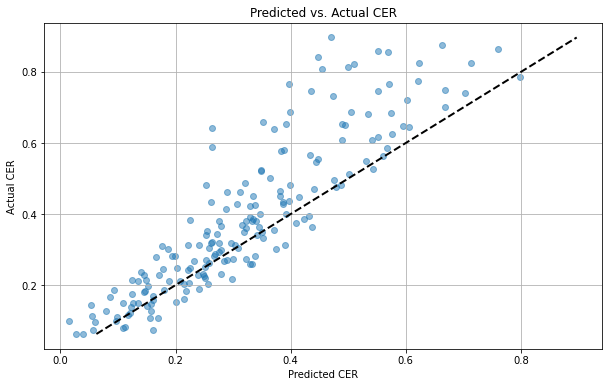

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Data preparation
readable_df['file'] = readable_df['file'].str.replace('.txt', '')
merged_df = pd.merge(predicted_cer_df, readable_df, left_on='filename', right_on='file')

# Statistical Calculations
r2 = r2_score(merged_df['CER'], merged_df['predicted_cer'])
mse = mean_squared_error(merged_df['CER'], merged_df['predicted_cer'])
mae = mean_absolute_error(merged_df['CER'], merged_df['predicted_cer'])

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['predicted_cer'], merged_df['CER'], alpha=0.5)
plt.title('Predicted vs. Actual CER')
plt.xlabel('Predicted CER')
plt.ylabel('Actual CER')
plt.grid(True)
plt.plot([merged_df['CER'].min(), merged_df['CER'].max()], [merged_df['CER'].min(), merged_df['CER'].max()], 'k--', lw=2)
plt.annotate(f'R² = {r2:.4f}', (0.05, 0.95), textcoords='axes fraction', fontsize=12)
plt.show()
